In [3]:
import csv
import re
import numpy as np
import pandas
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from IPython.display import clear_output

%matplotlib inline

### Parametere

In [4]:
n_components = 2   # Kan ikke egentlig endre denne..

### Funksjoner

In [7]:
def do_pca(data):
    
    data.dropna(how='any', inplace=True)
    pca = PCA(n_components=n_components)
    pca.fit(data)
    transformed_data = pca.transform(data)
    newdata = pandas.concat([data.reset_index()[['Navn', 'Team']], pandas.DataFrame(transformed_data)], axis=1)
    
    components = pandas.concat([data.transpose().reset_index()['index'], pandas.DataFrame({'1':pca.components_[0]}), pandas.DataFrame({'2':pca.components_[1]})], axis=1).set_index('index')
    
    return newdata, components

def plot_pca(newdata):
    ms = 90
    ax = newdata[newdata['Team']=='IM'].plot(kind='scatter', x=0, y=1, s=ms, color='Turquoise', label='IM', figsize=(12,12))
    newdata[newdata['Team']=='BST' ].plot(kind='scatter', x=0, y=1, s=ms, color='Gold', label='BST', ax=ax)
    newdata[newdata['Team']=='ITST'].plot(kind='scatter', x=0, y=1, s=ms, color='Red', label='ITST', ax=ax)

    for navn, team, x, y in newdata.values:
        if team == 'IM':
            horz = 'right'
        else:
            horz = 'left'
        shortname = re.match('([A-Za-z]+)\,?', navn).group(1)
        plt.annotate(shortname, xy=(x, y), textcoords = 'offset points', xytext = (0,8), horizontalalignment = horz)
        
    pass

def plot_component(components, ind):
    
    plt.figure()
    components.sort(str(ind))[str(ind)].plot(kind='barh', figsize=(8,30), title='PCA component ' + str(ind));
    
    pass

# Kompetanse

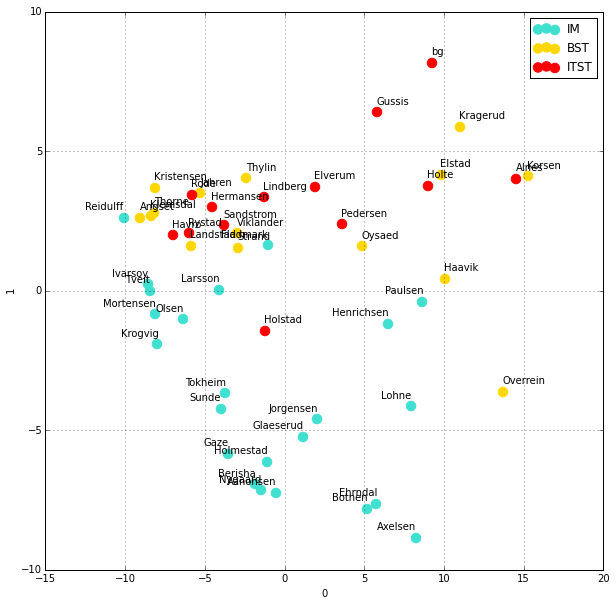

In [6]:
# Last data
data = pandas.DataFrame.from_csv('20150408 LBK Kompetanse_formatert.csv', sep=';', index_col=[0,1])

newdata, components = do_pca(data)

plot_pca(newdata)


#### x-component

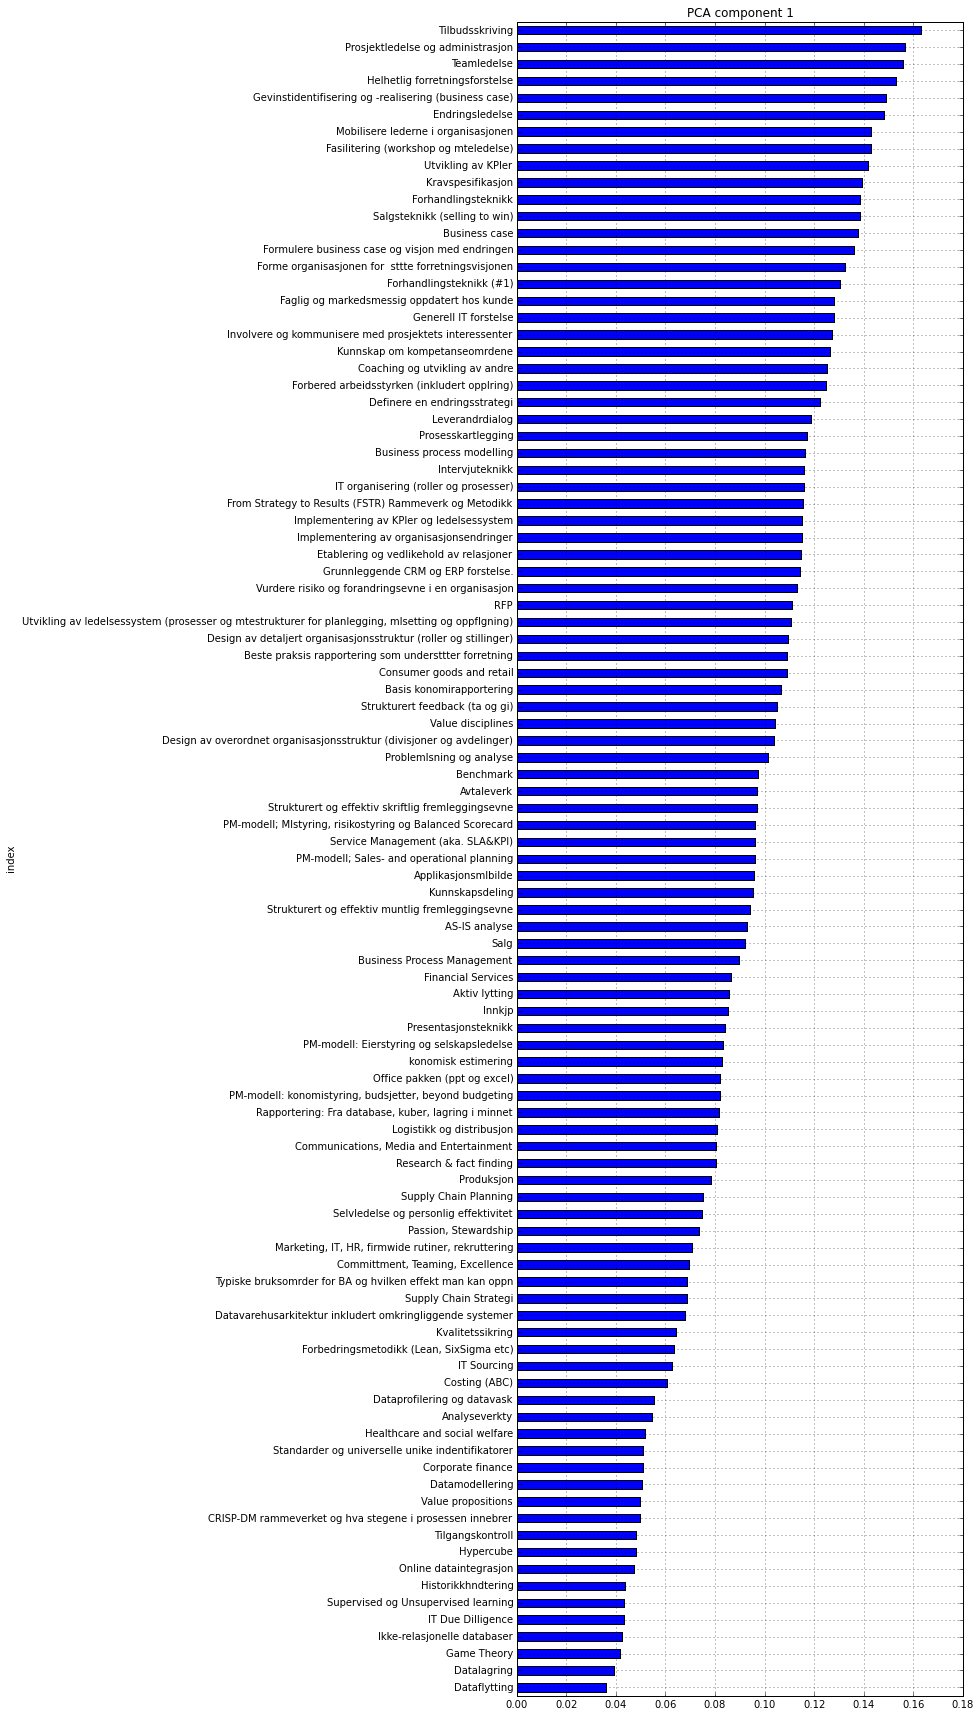

In [5]:
plot_component(components, 1)

#### y-component

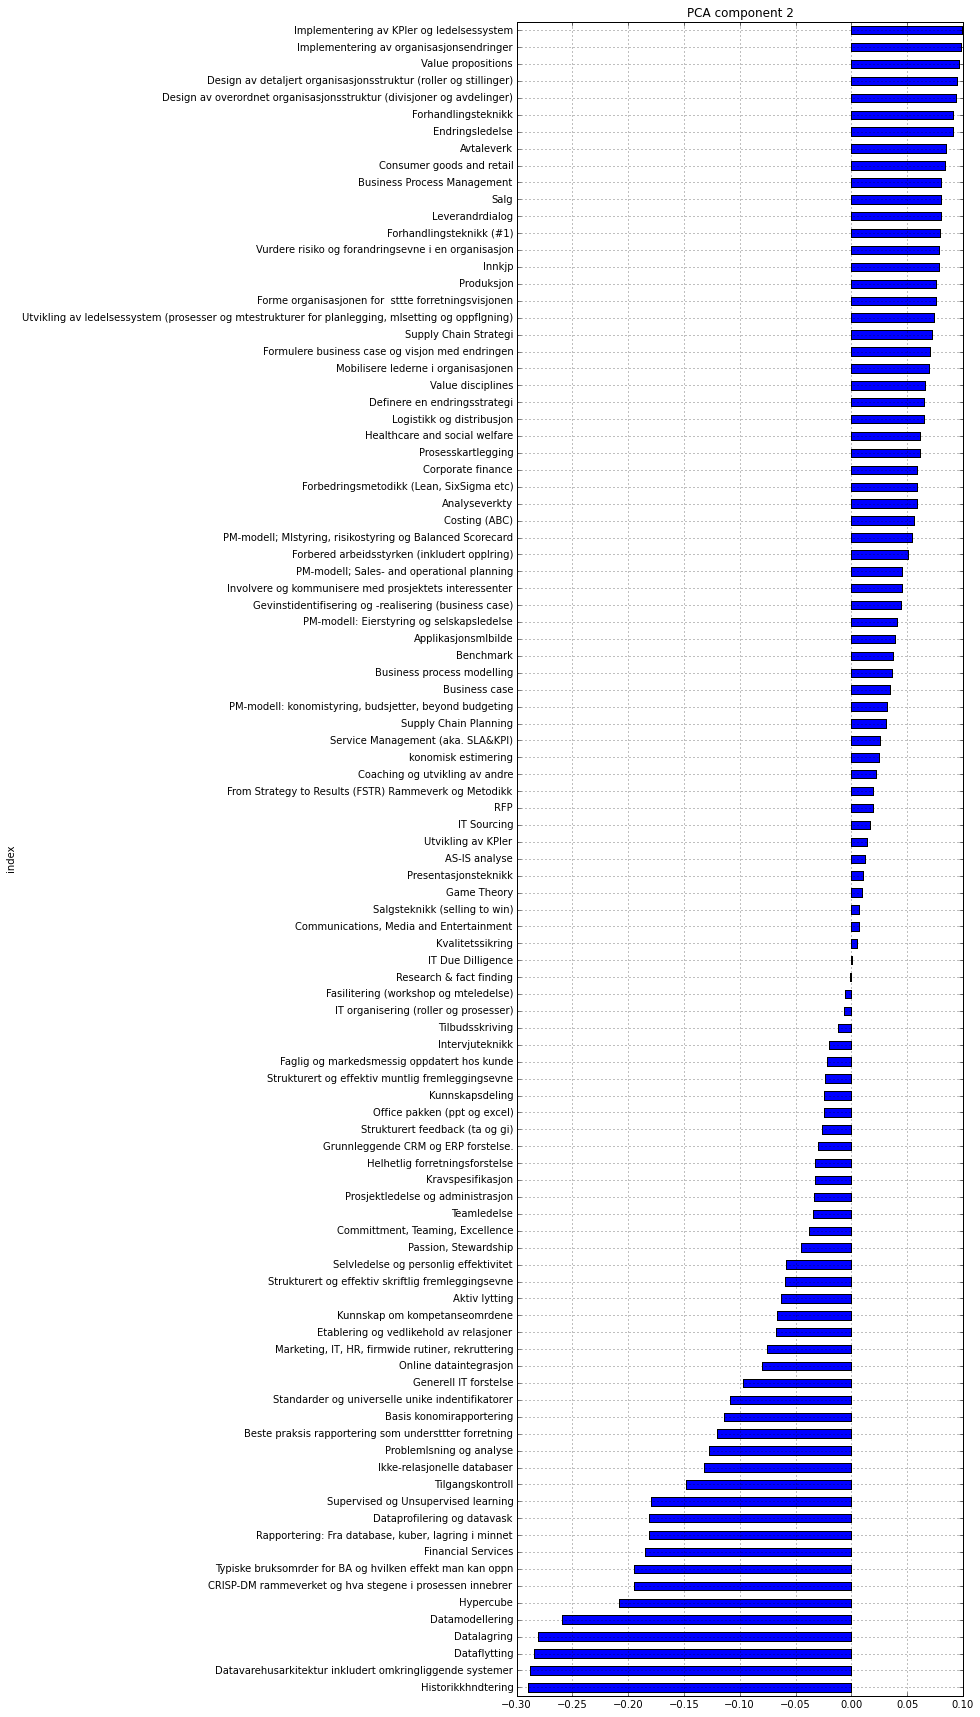

In [6]:
plot_component(components, 2)

# Interesse

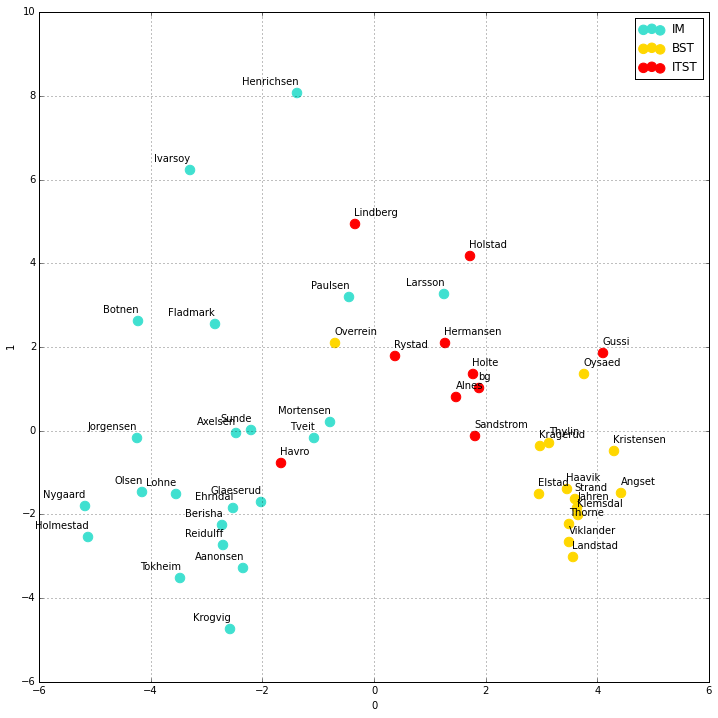

In [8]:
# Last data
data = pandas.DataFrame.from_csv('20150408 LBK Interesse_formatert.csv', sep=';', index_col=[0,1])

newdata, components = do_pca(data)

plot_pca(newdata)

#### x-component

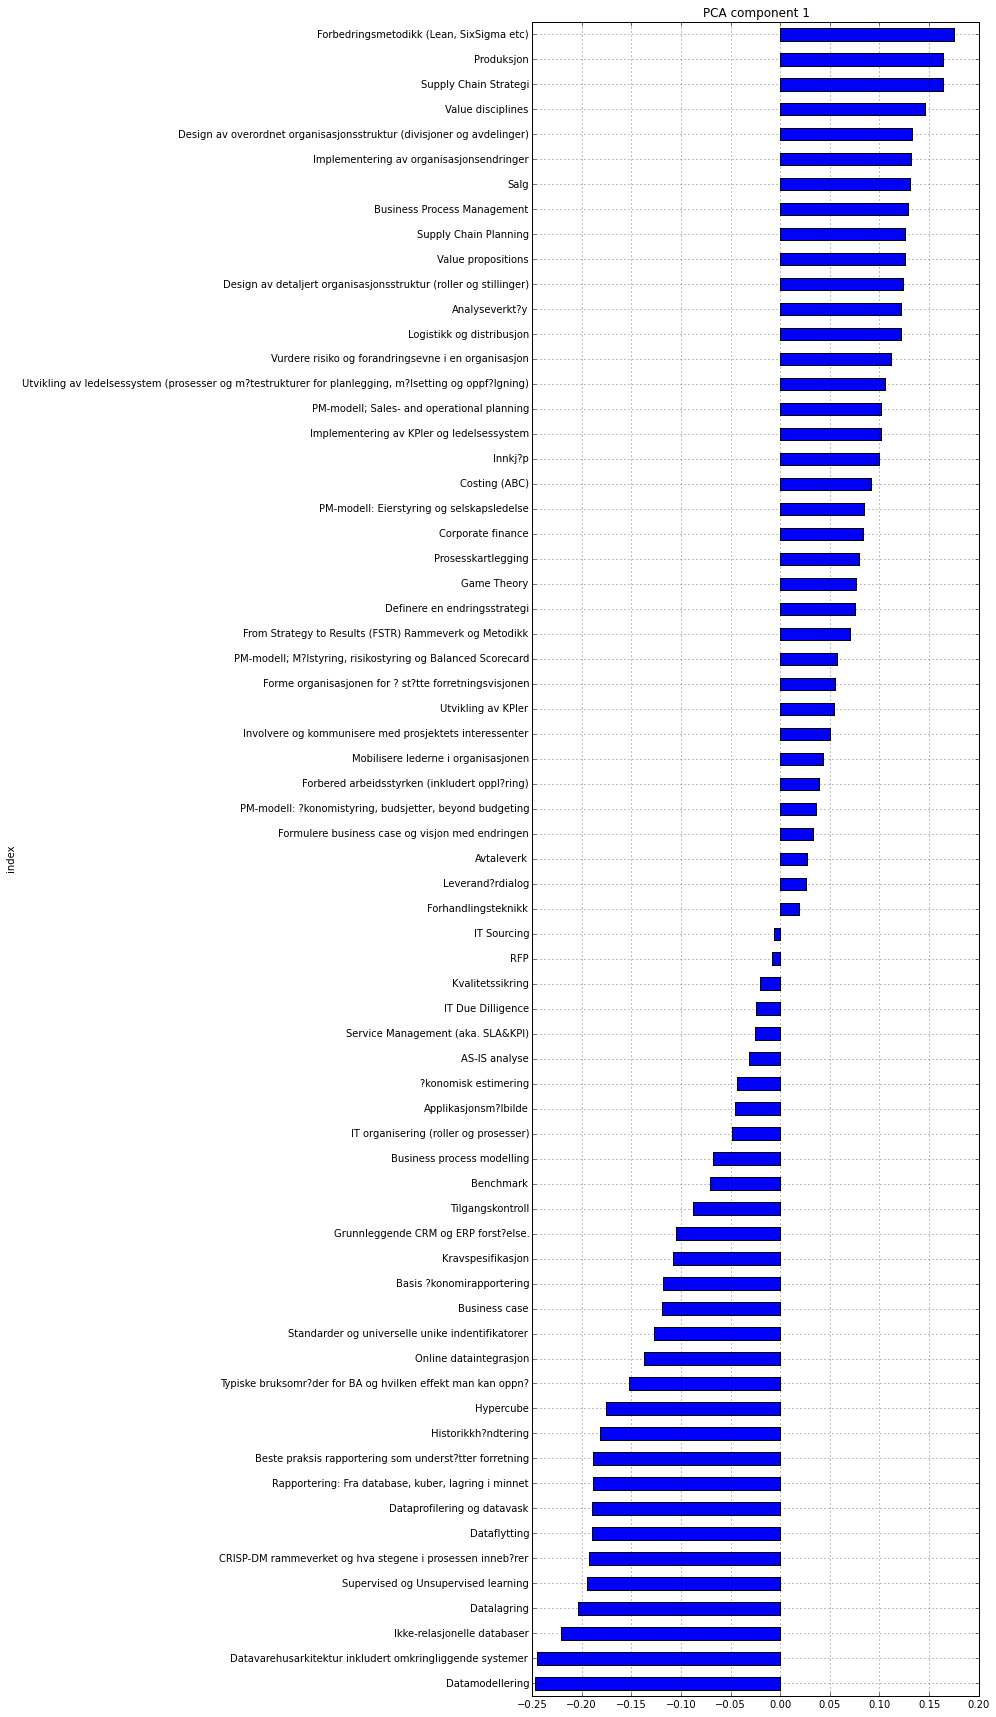

In [8]:
plot_component(components, 1)

#### y-component

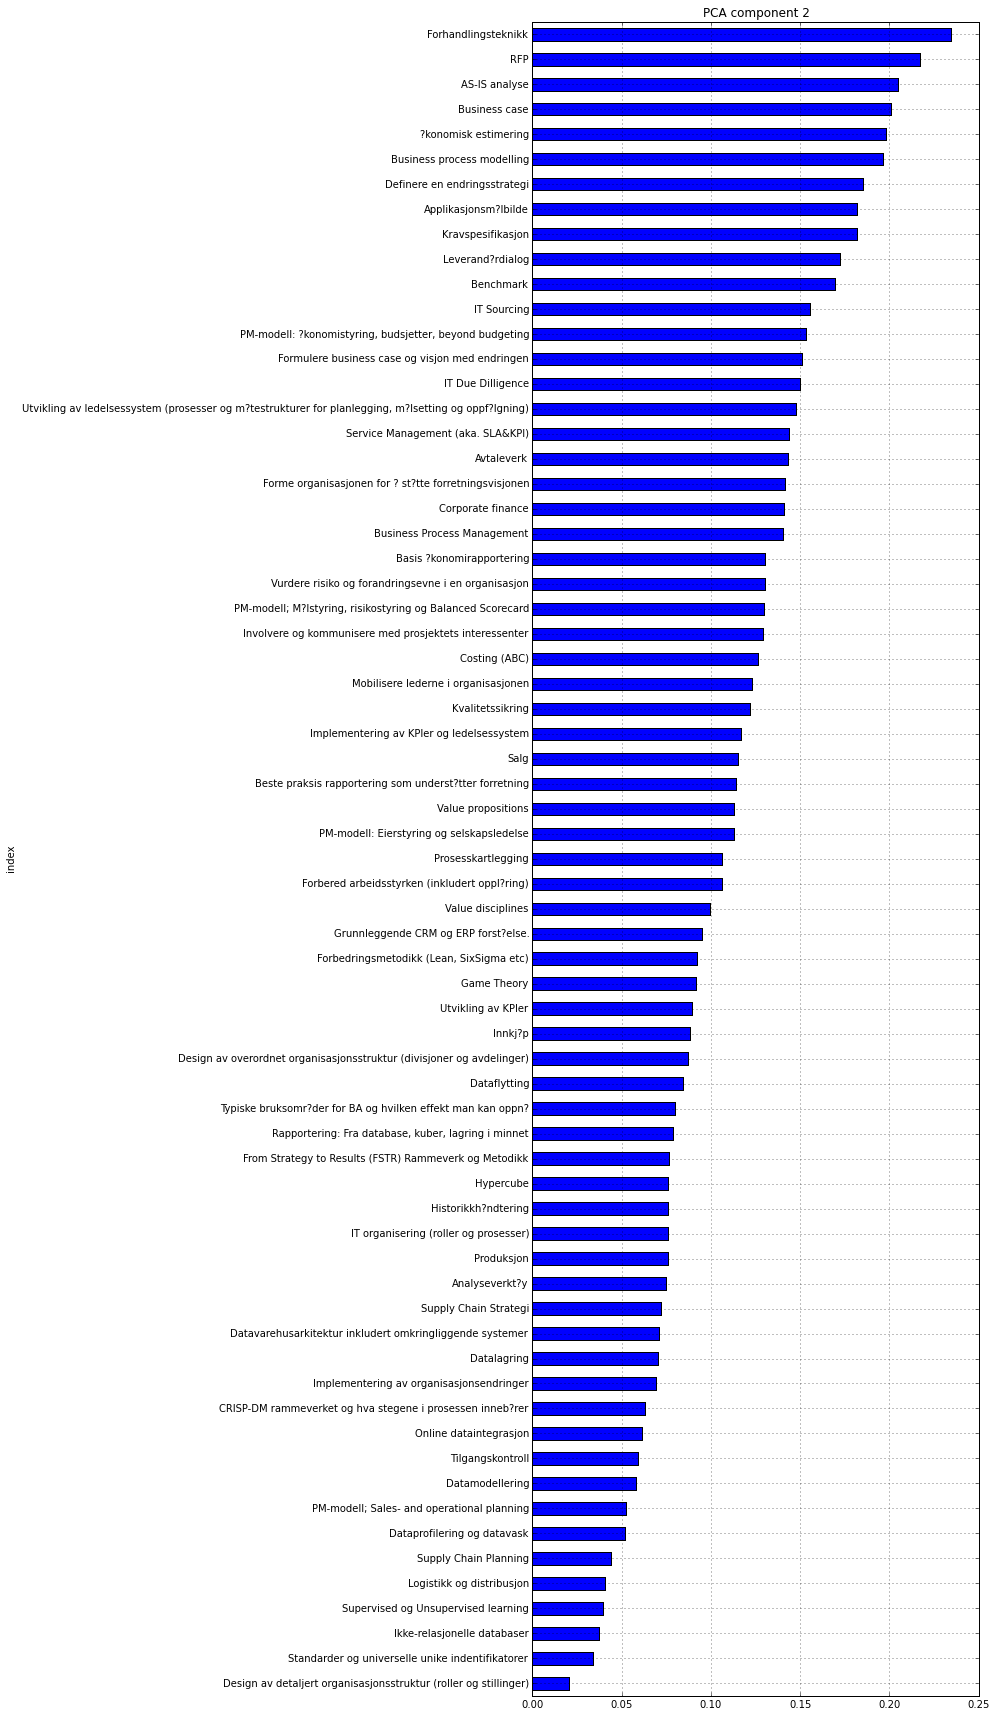

In [9]:
plot_component(components, 2)

# Kombinert

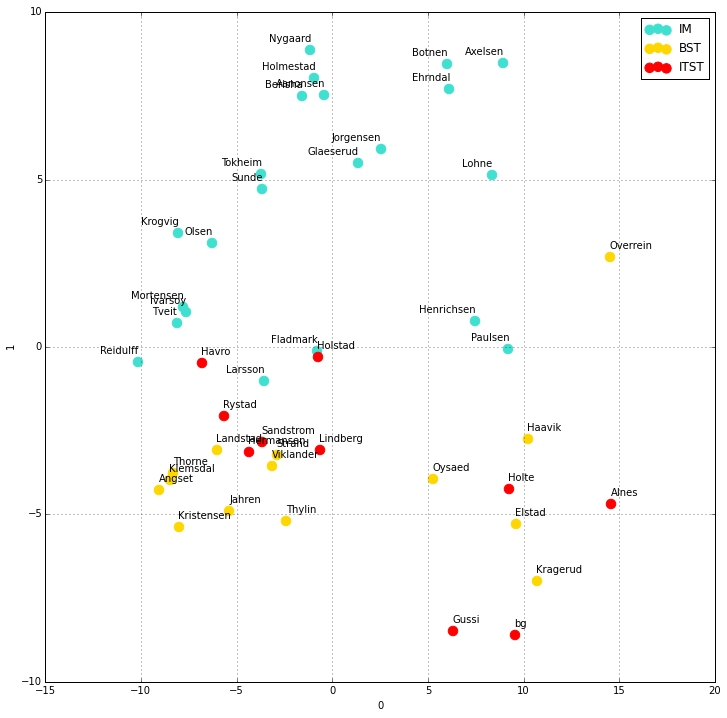

In [9]:
# Last data
data = pandas.DataFrame.from_csv('20150414 LBK Kombinert_formatert.csv', sep=';', index_col=[0,1])

newdata, components = do_pca(data)

plot_pca(newdata)

#### x-component


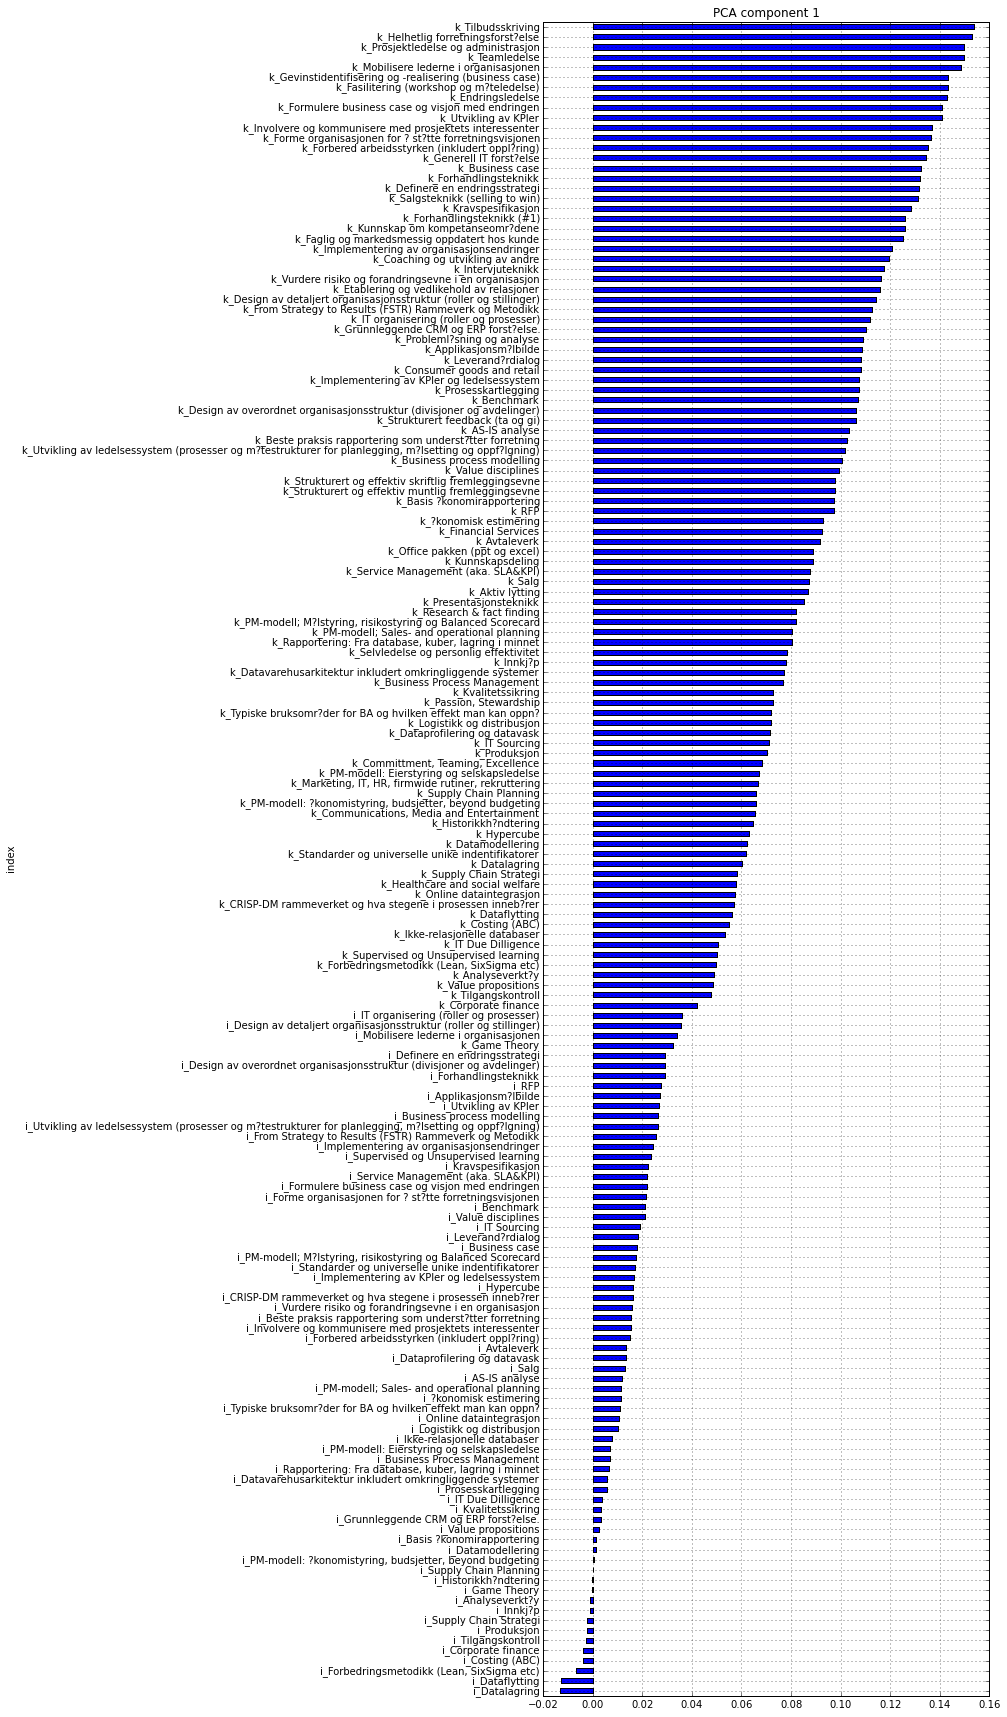

In [11]:
plot_component(components, 1)

#### y-component


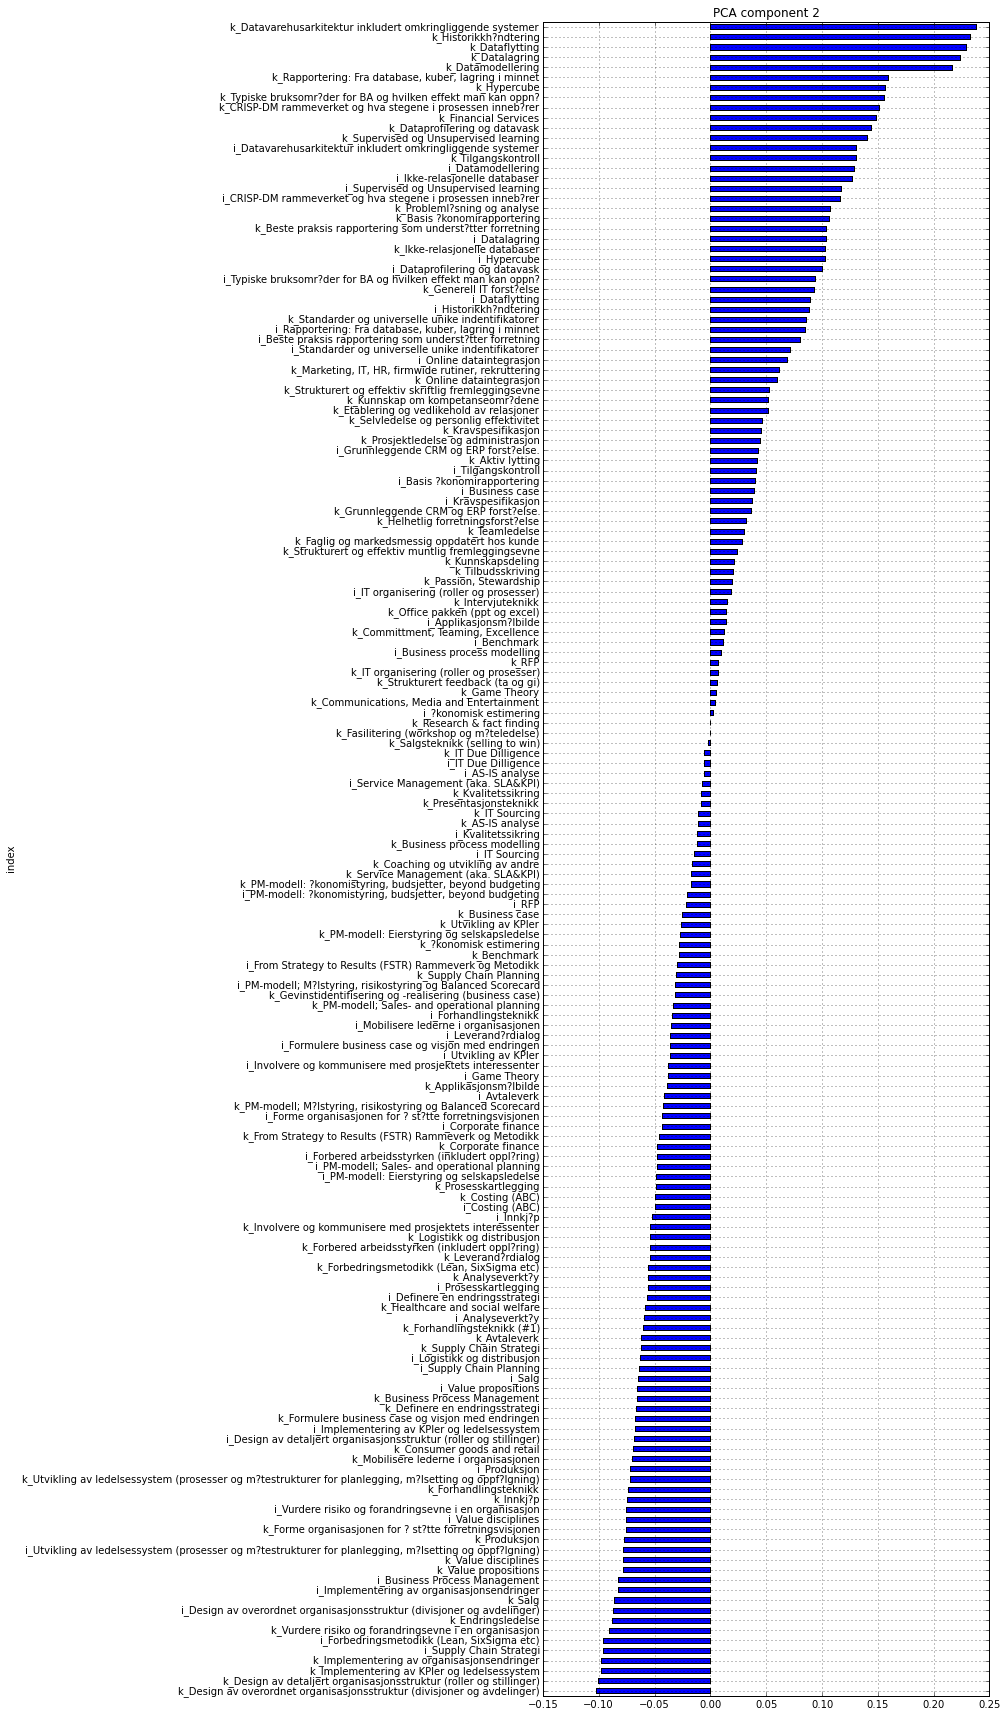

In [12]:
plot_component(components, 2)

In [ ]:
#col = np.array(data.iloc[0]) - np.array(pca.mean_)
#print pca.transform(np.array(data.iloc[0]))
#print sum( col * pca.components_[0] )
#print sum( col * pca.components_[1] )